In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from dl_lib import *
from Cifar10 import cifar10_load_train_data, cifar10_load_test_data

In [3]:
def prt_dataset(images, labels, is_gray=False):
    plt.figure(figsize=(10,10))
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if is_gray:
            plt.imshow(images[i].reshape(images.shape[1], images.shape[2]), cmap=plt.cm.binary)
        else:
            plt.imshow(images[i])
        plt.xlabel('label:' + str(labels[i]))
    plt.show()

def plt_result(results:dict):
    for k, v in results.items():
        plt.plot(v, label=k)
    plt.xlabel('Epoch')
    plt.ylabel(k)
    plt.legend(loc='upper left')

In [4]:
dataset_dir_path = './dataset/cifar-10-batches-py/'
is_cvt_gray = False

images shape: (50000, 32, 32, 3)
labels shape: (50000, 1)


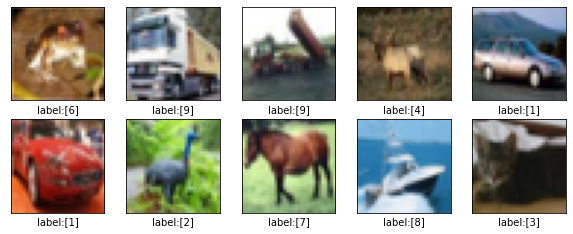

In [5]:
train_imgs, train_labs = cifar10_load_train_data(dataset_dir_path, is_to_gray=is_cvt_gray)
prt_dataset(train_imgs, train_labs, is_gray=is_cvt_gray)

images shape: (10000, 32, 32, 3)
labels shape: (10000, 1)


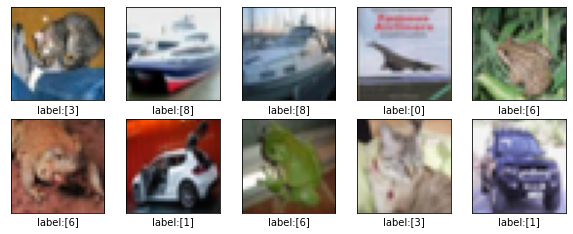

In [6]:
test_imgs, test_labs = cifar10_load_test_data(dataset_dir_path, is_to_gray=is_cvt_gray)
prt_dataset(test_imgs, test_labs, is_gray=is_cvt_gray)

In [7]:
### model x
train_x, test_x = train_imgs, test_imgs
### model y (labels one hot encoding)
onehot = OneHot(np.arange(0,10))
train_y, test_y = onehot.encoding(train_labs), onehot.encoding(test_labs)
print('train_x', train_x.shape)
print('test_x', test_x.shape)
print('train_y', train_y.shape)
print('test_y', test_y.shape)

train_x (50000, 32, 32, 3)
test_x (10000, 32, 32, 3)
train_y (50000, 10, 1)
test_y (10000, 10, 1)


In [8]:
layers = (

    Conv(k_no=32, k_size=3, is_add_padding=True),
    ReLU(),
    Conv(k_no=32, k_size=3, is_add_padding=True),
    BatchNorm(),
    ReLU(),
    MaxPooling(2),
    Dropout(0.1),

    Conv(k_no=64, k_size=3, is_add_padding=True),
    ReLU(),
    Conv(k_no=64, k_size=3, is_add_padding=True),
    BatchNorm(),
    ReLU(),
    MaxPooling(2),
    Dropout(0.1),

    Flatten(),

    Dense(512),
    BatchNorm(),
    ReLU(),
    Dropout(0.5),

    Dense(10),
    BatchNorm(),
    Softmax(),

)

In [9]:
model = Model(layers=layers)
loss = CategoricalCrossEntropy()
optimizer=Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, lossfunc=loss)

In [10]:
### training
history = model.fit(train_x, train_y, test_x, test_y, epoch=50, batch_size=256, clean_opt=50)


<01> --------------------------------------------------------------------------------
    training[========================>] acc:37.86, loss:1.7727
    evaluate[========================>] acc:50.13, loss:1.5313

<02> --------------------------------------------------------------------------------
    training[========================>] acc:49.00, loss:1.4916
    evaluate[========================>] acc:51.97, loss:1.5652

<03> --------------------------------------------------------------------------------
    training[========================>] acc:52.68, loss:1.3843
    evaluate[========================>] acc:55.02, loss:1.5053

<04> --------------------------------------------------------------------------------
    training[========================>] acc:55.45, loss:1.3049
    evaluate[========================>] acc:57.62, loss:1.4681

<05> --------------------------------------------------------------------------------
    training[========================>] acc:57.46, loss:1.243

In [11]:
model.save('cifar10_ch3_conv2_p1_conv2_p1_h512_10.model')

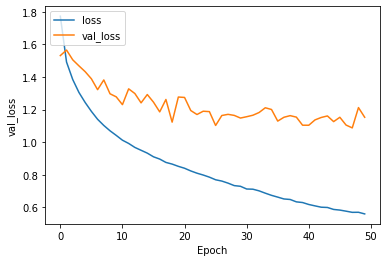

In [12]:
### 損失函數
plt_result({
    'loss' : history['los'],
    'val_loss': history['val_los'],
})

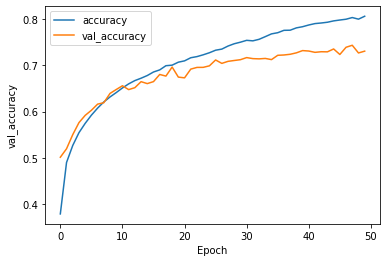

In [13]:
# 準確度
plt_result({
    'accuracy': history['acc'],
    'val_accuracy' : history['val_acc'],
})

In [14]:
### 模組評估
print('model:', model.evaluate(test_x, test_y))

    evaluate[========================>] acc:73.10, loss:1.1527
model: (0.7309754430618401, 1.1527368441178498)
